In [1]:
#Import Libraries
import numpy as np
import scipy.optimize as so
import matplotlib.pyplot as plt
import os

## Model Definitions

In [2]:
from modelfn import *

In [3]:
helpnotes

'List of Model Functions: \n actkinr() actkin() d2DTOT() DTOT2d() DTOT2AK() DTOT2AKnorm()\n List of Other Functions:\n gendat() checkpos()  solrange() parsepar()\n Some other functions accept a variable fitflag with value of 0,1 or2.\n fitflag=0 allows all parameters to vary.\n fitflag=1 sets Kdim to a value of 0.1\n fitflag=2 sets Kdim=0.1 and RAF=0.04'

In [4]:
paramsbase={'f':0.01,'g':100,'KA':10,'rafr':0.4,'RAF':0.04,'Kdim':0.1,'Kd':0.1}
dr=np.sqrt(2)/2 # irrational dr for validation will enhance any mismatches and avoid coincidental cancellations which may hide numerical errors.
d1=dr*paramsbase['Kd']
d1,actkinr(dr,paramsbase),actkin(d1,paramsbase), d2DTOT(d1,paramsbase),DTOT2d(0.2189685447143698,paramsbase),DTOT2AK(0.2189685447143698,paramsbase)

(0.07071067811865477,
 0.1762055823754643,
 0.17620558237546433,
 0.07927729536203741,
 0.20579081054605694,
 0.24620257675531507)

In [5]:
paramst0=dict(paramsbase)
def fKAscanFC(fin,ka):
    paramst0['f']=fin
    paramst0['KA']=ka
    return solranger(paramst0)
# how low does rafr need to be to get to 5x FC with KA~0 and f,g at limiting magnitudes.
solrange({'f':10**-6,'g':10000.,'KA':0.0001,'rafr':0.05,'RAF':0.005,'Kdim':0.1,'Kd':0.1})

(0.09828136178419603, 5.932169015656421, 7024.616784336002)

### Figure 2 : Conformal Autoinhibition model

In [6]:
paramsbase={'KA':10.,'rafr':0.4,'Kd':0.1,'Kdim':0.1,'RAF':0.04,'f':1.0,'g':1.0} #units: micro-molar

def gen_contourpts(xpar_label,xlog10range,ypar_label,ylog10range):
    npts=10000 # total number of points to plot
    npts=int(np.sqrt(npts)) # square root of the number of points to put on a square grid
    xlist = np.linspace(xlog10range[0],xlog10range[1],npts)
    ylist = np.linspace(ylog10range[0],ylog10range[1],npts)
    X, Y = np.meshgrid(xlist, ylist)
    X, Y = np.meshgrid(xlist, ylist)
    def callfnr(x1,y1):
        params1=dict(paramsbase)
        params1[ypar_label]=10**y1
        params1[xpar_label]=10**x1
    #     print(params1)
        try:
            resarr=solrange(params1)
    #         print(resarr)
            if resarr[0]>10**-5:
                return  [np.log10(resarr[1]),np.log10(resarr[2])]
            else:
                return [float('nan'),float('nan')]
        except:
            return [float('nan'),float('nan')]
    zfc=[]
    zr=[]
    for itr in range(len(X)):
        zfc=zfc+[[]]
        zr=zr+[[]]
        for jtr in range(len(X[itr])):
            res=callfnr(X[itr][jtr],Y[itr][jtr])
            zfc[itr]=zfc[itr]+[res[0]]
            zr[itr]=zr[itr]+[res[1]]
    return X,Y,zr,zfc

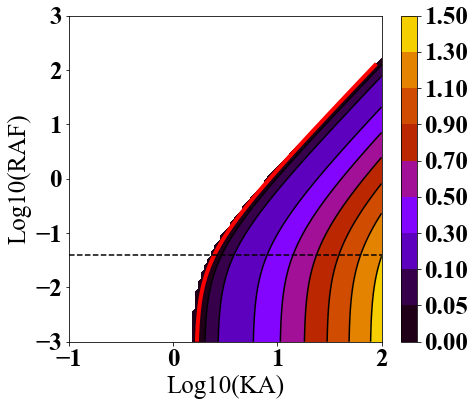

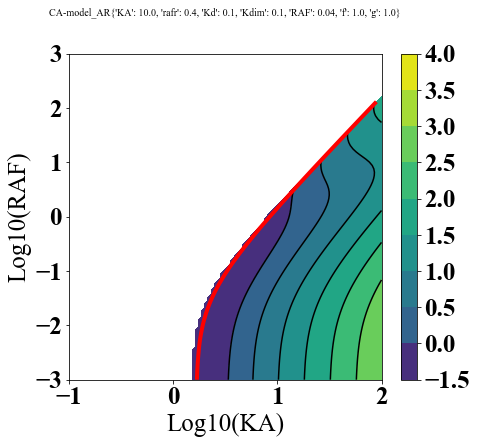

Wall time: 21.8 s


In [7]:
%%time
xpar_label='KA'
ypar_label='RAF'
xlog10range=[-1,2]
ylog10range=[-3,3]
X,Y,zr,zfc=gen_contourpts(xpar_label,xlog10range,ypar_label,ylog10range)
# npts=20
# xlist=np.linspace(-1,0.5,npts)
# ylist=np.linspace(-1,0,npts)
# Xin,Yin=np.meshgrid(xlist,ylist)
# Zin=[[callfnr(Xin[itr][jtr],Yin[itr][jtr]) for jtr in range(len(Xin[itr]))] for itr in range(len(Xin))]
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 25}
plt.rc('font', **font)
plt.figure(figsize=(7,6))
colormaptype='gnuplot'
fileid="foldchange"
levels=[0.0,0.05,0.1]+[i/100 for i in range(30,151,20)]
cp0 = plt.contourf(X,Y,zfc,cmap=colormaptype,levels=levels)
plt.contour(cp0,colors='k',linewidths=1.5)
plt.colorbar(cp0)
plt.plot([-1,2],[np.log10(0.04),np.log10(0.04)],'k--')
minlevel=0.0278
plt.contour(cp0,colors='r',linewidths=4.,levels=[minlevel],linestyles='solid')
plt.xlabel('Log10({})'.format(xpar_label))
plt.ylabel('Log10({})'.format(ypar_label))
# figname="Unified-fgKA-model_"+fileid+"_fvsg_"+"RAFrel"+str(paramsbaser['rafr'])+"_KA"+str(paramsbaser['KA'])+".pdf"
# plt.savefig(figname,dpi=300)
# print(figname)
plt.show()


plt.figure(figsize=(7,6))
colormaptype='viridis'
fileid="AR"
levels=[-1.5]+[i/10 for i in range(0,45,5)]
cp = plt.contourf(X,Y,zr,cmap=colormaptype,levels=levels)
plt.contour(cp,colors='k',linewidths=1.5)
plt.colorbar(cp)
plt.contour(cp0,colors='r',linewidths=4.,levels=[minlevel],linestyles='solid')
# plt.plot([-0.4,-0.4],[-5,0],'--k')
plt.xlabel('Log10({})'.format(xpar_label))
plt.ylabel('Log10({})'.format(ypar_label))
figname="CA-model_"+fileid+str(paramsbase)
plt.title(figname,size=10,y=1.1)
plt.show()

In [8]:
paramsCA=paramsbase.copy()
paramsCA['KA']=10.
paramsCA['RAF']=0.04
print('maximum fold change in CA model:',round(10**max([col for row in zfc for col in row if str(col) != 'nan']),2),'\nMax Fold change at RAF=0.04uM and KA=10: ',round(solrange(paramsCA)[1],2))
paramsCA['KA']=100.
'\nMax Fold change at RAF=0.04uM and KA=100 (max): ',round(solrange(paramsCA)[1],2)

maximum fold change in CA model: 25.25 
Max Fold change at RAF=0.04uM and KA=10:  2.37


('\nMax Fold change at RAF=0.04uM and KA=100 (max): ', 19.71)

###### Contour plot base model for Kd vs KA and Kdim vs KA

In [9]:
bdyglobal

{'f': [1e-05, 100],
 'g': [1, 10000],
 'KA': [0.1, 100],
 'Kd': [0.0001, 10000],
 'Kdim': [0.0001, 10000],
 'RAF': [0.0001, 1000]}

In [21]:
%%time
xpar_label='Kd'
ypar_label='RAF'
xlog10range=[-3,3]
ylog10range=[-3,3]
X,Y,zr,zfc=gen_contourpts(xpar_label,xlog10range,ypar_label,ylog10range)

Wall time: 36.4 s


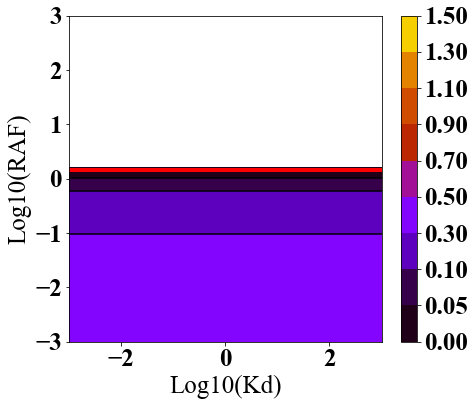

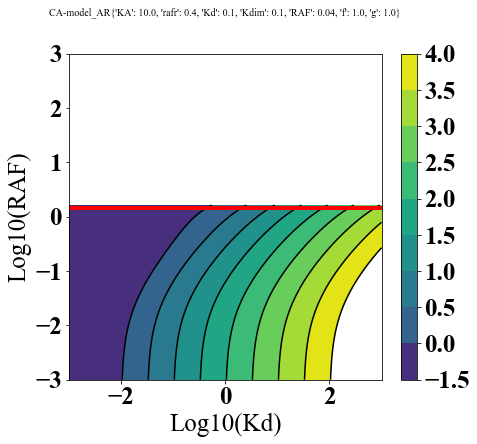

In [22]:
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 25}
plt.rc('font', **font)
plt.figure(figsize=(7,6))
colormaptype='gnuplot'
fileid="foldchange"
levels=[0.0,0.05,0.1]+[i/100 for i in range(30,151,20)]
cp0 = plt.contourf(X,Y,zfc,cmap=colormaptype,levels=levels)
plt.contour(cp0,colors='k',linewidths=1.5)
plt.colorbar(cp0)
# plt.plot([-1,2],[np.log10(0.04),np.log10(0.04)],'k--')
minlevel=0.0278
plt.contour(cp0,colors='r',linewidths=4.,levels=[minlevel],linestyles='solid')
plt.xlabel('Log10({})'.format(xpar_label))
plt.ylabel('Log10({})'.format(ypar_label))
# figname="Unified-fgKA-model_"+fileid+"_fvsg_"+"RAFrel"+str(paramsbaser['rafr'])+"_KA"+str(paramsbaser['KA'])+".pdf"
# plt.savefig(figname,dpi=300)
# print(figname)
plt.show()


plt.figure(figsize=(7,6))
colormaptype='viridis'
fileid="AR"
levels=[-1.5]+[i/10 for i in range(0,45,5)]
cp = plt.contourf(X,Y,zr,cmap=colormaptype,levels=levels)
plt.contour(cp,colors='k',linewidths=1.5)
plt.colorbar(cp)
plt.contour(cp0,colors='r',linewidths=4.,levels=[minlevel],linestyles='solid')
# plt.plot([-0.4,-0.4],[-5,0],'--k')
plt.xlabel('Log10({})'.format(xpar_label))
plt.ylabel('Log10({})'.format(ypar_label))
figname="CA-model_"+fileid+str(paramsbase)
plt.title(figname,size=10,y=1.1)
plt.show()

In [17]:
%%time
xpar_label='Kdim'
ypar_label='RAF'
xlog10range=[-3,3]
ylog10range=[-3,3]
X,Y,zr,zfc=gen_contourpts(xpar_label,xlog10range,ypar_label,ylog10range)

Wall time: 44.3 s


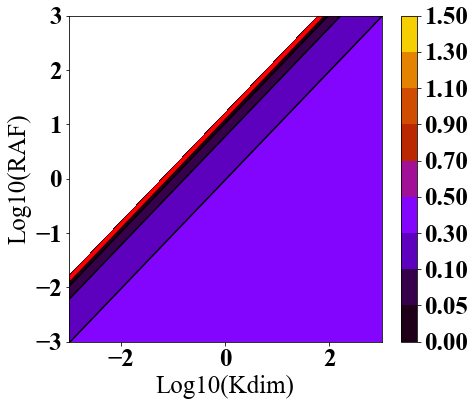

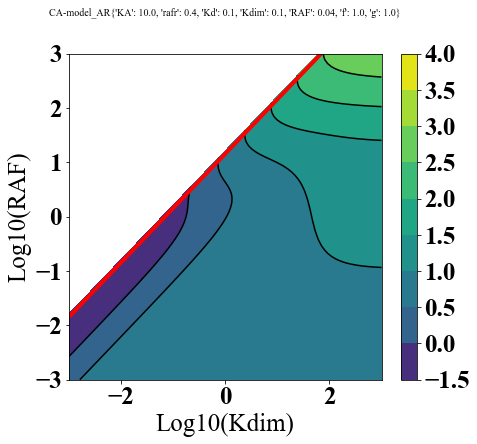

In [20]:
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 25}
plt.rc('font', **font)
plt.figure(figsize=(7,6))
colormaptype='gnuplot'
fileid="foldchange"
levels=[0.0,0.05,0.1]+[i/100 for i in range(30,151,20)]
cp0 = plt.contourf(X,Y,zfc,cmap=colormaptype,levels=levels)
plt.contour(cp0,colors='k',linewidths=1.5)
plt.colorbar(cp0)
# plt.plot([-1,2],[np.log10(0.04),np.log10(0.04)],'k--')
minlevel=0.0278
plt.contour(cp0,colors='r',linewidths=4.,levels=[minlevel],linestyles='solid')
plt.xlabel('Log10({})'.format(xpar_label))
plt.ylabel('Log10({})'.format(ypar_label))
# figname="Unified-fgKA-model_"+fileid+"_fvsg_"+"RAFrel"+str(paramsbaser['rafr'])+"_KA"+str(paramsbaser['KA'])+".pdf"
# plt.savefig(figname,dpi=300)
# print(figname)
plt.show()


plt.figure(figsize=(7,6))
colormaptype='viridis'
fileid="AR"
levels=[-1.5]+[i/10 for i in range(0,45,5)]
cp = plt.contourf(X,Y,zr,cmap=colormaptype,levels=levels)
plt.contour(cp,colors='k',linewidths=1.5)
plt.colorbar(cp)
plt.contour(cp0,colors='r',linewidths=4.,levels=[minlevel],linestyles='solid')
# plt.plot([-0.4,-0.4],[-5,0],'--k')
plt.xlabel('Log10({})'.format(xpar_label))
plt.ylabel('Log10({})'.format(ypar_label))
figname="CA-model_"+fileid+str(paramsbase)
plt.title(figname,size=10,y=1.1)
plt.show()

### Impact of RAF concentration on model predictions

## Supplementary Figure 2 A

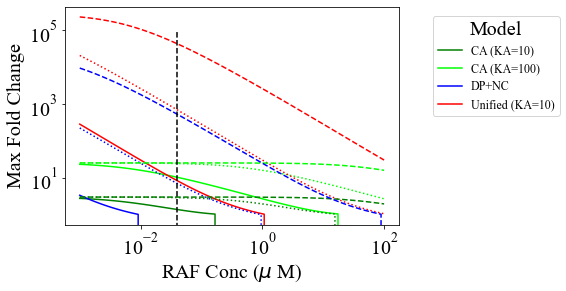

In [6]:
# make an example plot in the fg model. Note that setting Kdim to 0.1 gives much lower values of PA than with Kdim =2 (measured by therrien)

font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 20}
plt.rc('font', **font)
xdat=list(10**np.linspace(-3,2,100)) # RAF concentration range

paramsplt0={'f':10**-5,'KA':10.,'g':100.,'rafr':0.4,'Kd':0.1,'Kdim':0.1} #units: micro-molar
kdimvals=[0.01,1,100]
ltlist=['solid','dotted','dashed','dashdot',(0, (3, 5, 1, 5, 1, 5))]
for it1 in range(len(kdimvals)):
    paramsplt0['Kdim']=kdimvals[it1]
#     plt.title(str(paramsplt0),size=10)
    paramsplt0['g']=1.
    paramsplt0['f']=1.
    paramsplt0['KA']=10.
    ydat= []
    for raf in xdat:
        paramsplt0['RAF']=raf
        try:
            solfc=solrange(paramsplt0)[1]
        except:
            solfc=1.
        ydat=ydat+[solfc]
    plt.plot(xdat,ydat,label='CA (KA=10)',color='g',linestyle=ltlist[it1])

    paramsplt0['g']=1.
    paramsplt0['f']=1.
    paramsplt0['KA']=100.
    ydat= []
    for raf in xdat:
        paramsplt0['RAF']=raf
        try:
            solfc=solrange(paramsplt0)[1]
        except:
            solfc=1.
        ydat=ydat+[solfc]
    plt.plot(xdat,ydat,label='CA (KA=100)',color='lime',linestyle=ltlist[it1])

    paramsplt0['g']=100.
    paramsplt0['f']=10**-5.
    paramsplt0['KA']=0.0001
    ydat= []
    for raf in xdat:
        paramsplt0['RAF']=raf
        try:
            solfc=solrange(paramsplt0)[1]
        except:
            solfc=1.
        ydat=ydat+[solfc]
    plt.plot(xdat,ydat,label='DP+NC',color='b',linestyle=ltlist[it1])

    paramsplt0['g']=100.
    paramsplt0['f']=10**-5.
    paramsplt0['KA']=10.
    ydat= []
    for raf in xdat:
        paramsplt0['RAF']=raf
        try:
            solfc=solrange(paramsplt0)[1]
        except:
            solfc=1.
        ydat=ydat+[solfc]
    plt.plot(xdat,ydat,label='Unified (KA=10)',color='r',linestyle=ltlist[it1])

    if it1==0:
        plt.legend(loc=(1.1,0.5),title='Model',fontsize=12)
plt.plot([0.04,0.04],[0.0,10**5],'k--') # typical concentration of RAF
plt.xscale('log')
plt.yscale('log')
plt.xlabel('RAF Conc ($\mu$ M)')
plt.ylabel('Max Fold Change')
plt.show()
#-- Begin: custom legend - uncomment to redraw legend for the Kdim values.
# from matplotlib.lines import Line2D

# legend_elements = [Line2D([0], [0], color='k', lw=4, label=kdimvals[i] ,linestyle=ltlist[i]) for i in range(len(kdimvals))]
# plt.legend(handles=legend_elements,loc='upper center',bbox_to_anchor=(0.5,1.4),title='Kdim(uM)',ncol=len(kdimvals))
# #-- End: custom legend
# plt.show()

## Fold-chane in all models are a function of RAF/Kdim ratio and not RAF or Kdim separately 
- As expected , all curves in a given model, with different Kdim, collapse into one curve with RAF/Kdim on the x-axis.

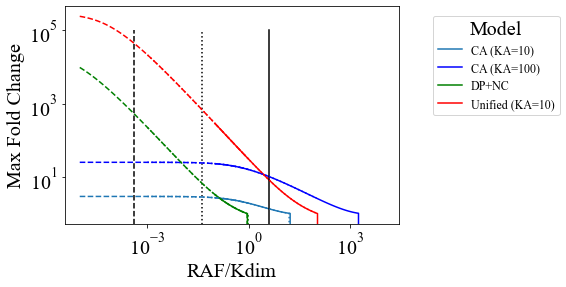

In [7]:
# make an example plot in the fg model. Note that setting Kdim to 0.1 gives much lower values of PA than with Kdim =2 (measured by therrien)
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 20}
plt.rc('font', **font)
xdat=list(10**np.linspace(-3,2,100)) # RAF concentration range

paramsplt0={'f':10**-5,'KA':10.,'g':100.,'rafr':0.4,'Kd':0.1,'Kdim':0.1} #units: micro-molar
kdimvals=[0.01,1,100]
ltlist=['solid','dotted','dashed','dashdot',(0, (3, 5, 1, 5, 1, 5))]
for it1 in range(len(kdimvals)):
    paramsplt0['Kdim']=kdimvals[it1]
#     plt.title(str(paramsplt0),size=10)
    paramsplt0['g']=1.
    paramsplt0['f']=1.
    paramsplt0['KA']=10.
    ydat= []
    for raf in xdat:
        paramsplt0['RAF']=raf
        try:
            solfc=solrange(paramsplt0)[1]
        except:
            solfc=1.
        ydat=ydat+[solfc]
    xdat1=[xdati/paramsplt0['Kdim'] for xdati in xdat]
    plt.plot(xdat1,ydat,label='CA (KA=10)',color='tab:blue',linestyle=ltlist[it1])

    paramsplt0['g']=1.
    paramsplt0['f']=1.
    paramsplt0['KA']=100.
    ydat= []
    for raf in xdat:
        paramsplt0['RAF']=raf
        try:
            solfc=solrange(paramsplt0)[1]
        except:
            solfc=1.
        ydat=ydat+[solfc]
    plt.plot(xdat1,ydat,label='CA (KA=100)',color='b',linestyle=ltlist[it1])

    paramsplt0['g']=100.
    paramsplt0['f']=10**-5.
    paramsplt0['KA']=0.0001
    ydat= []
    for raf in xdat:
        paramsplt0['RAF']=raf
        try:
            solfc=solrange(paramsplt0)[1]
        except:
            solfc=1.
        ydat=ydat+[solfc]
    plt.plot(xdat1,ydat,label='DP+NC',color='g',linestyle=ltlist[it1])

    paramsplt0['g']=100.
    paramsplt0['f']=10**-5.
    paramsplt0['KA']=10.
    ydat= []
    for raf in xdat:
        paramsplt0['RAF']=raf
        try:
            solfc=solrange(paramsplt0)[1]
        except:
            solfc=1.
        ydat=ydat+[solfc]
    plt.plot(xdat1,ydat,label='Unified (KA=10)',color='r',linestyle=ltlist[it1])

    if it1==0:
        plt.legend(loc=(1.1,0.5),title='Model',fontsize=12)
    plt.plot([0.04/paramsplt0['Kdim'],0.04/paramsplt0['Kdim']],[0.0,10**5],color='k',linestyle=ltlist[it1]) # typical concentration of RAF
plt.xscale('log')
plt.yscale('log')
plt.xlabel('RAF/Kdim')
plt.ylabel('Max Fold Change')
plt.show()
#-- Begin: custom legend
# from matplotlib.lines import Line2D

# legend_elements = [Line2D([0], [0], color='k', lw=4, label=kdimvals[i] ,linestyle=ltlist[i]) for i in range(len(kdimvals))]
# plt.legend(handles=legend_elements,loc='upper center',bbox_to_anchor=(0.5,1.4),title='Kdim(uM)',ncol=len(kdimvals))
# #-- End: custom legend
# plt.show()

## Supplementary Figure 2C

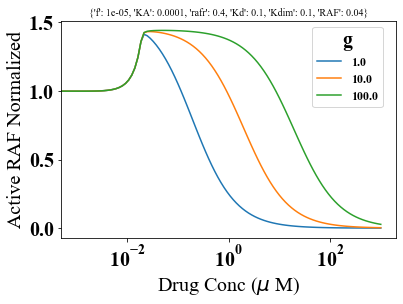

In [12]:
# make an example plot in the fg model. Note that setting Kdim to 0.1 gives much lower values of PA than with Kdim =2 (measured by therrien)

font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 20}
plt.rc('font', **font)
xdat=[0.]+list(10**np.linspace(-3,3,100))

paramsplt0={'f':10**-5,'KA':0.0001,'rafr':0.4,'Kd':0.1,'Kdim':0.1,'RAF':0.04} #units: micro-molar
plt.title(str(paramsplt0),size=10)

paramsplt0['g']=1.
ydat= [DTOT2AK(xval,paramsplt0)/DTOT2AK(0,paramsplt0) for xval in xdat]
plt.plot(xdat,ydat,label=str(paramsplt0['g']))

paramsplt0['g']=10.
ydat= [DTOT2AK(xval,paramsplt0)/DTOT2AK(0,paramsplt0) for xval in xdat]
plt.plot(xdat,ydat,label=str(paramsplt0['g']))

paramsplt0['g']=100.
ydat= [DTOT2AK(xval,paramsplt0)/DTOT2AK(0,paramsplt0) for xval in xdat]
plt.plot(xdat,ydat,label=str(paramsplt0['g']))

plt.legend(loc=(0.75,0.6),title='g',fontsize=12)
plt.xscale('log')
plt.xlabel('Drug Conc ($\mu$ M)')
plt.ylabel('Active RAF Normalized')

plt.show()

## Additional representative figure showing dose response curves with different mechanisms

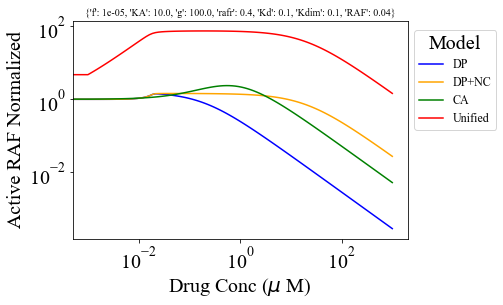

In [8]:
# make an example plot in the fg model. Note that setting Kdim to 0.1 gives much lower values of PA than with Kdim =2 (measured by therrien)

font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 20}
plt.rc('font', **font)
xdat=[0.]+list(10**np.linspace(-3,3,100))

paramsplt0={'f':10**-5,'KA':10.,'g':100.,'rafr':0.4,'Kd':0.1,'Kdim':0.1,'RAF':0.04} #units: micro-molar
plt.title(str(paramsplt0),size=10)

paramsplt0['g']=1.
paramsplt0['KA']=0.00001
ydat= [DTOT2AK(xval,paramsplt0)/DTOT2AK(0,paramsplt0) for xval in xdat]
plt.plot(xdat,ydat,label='DP',color='b')

paramsplt0['g']=100.
ydat= [DTOT2AK(xval,paramsplt0)/DTOT2AK(0,paramsplt0) for xval in xdat]
plt.plot(xdat,ydat,label='DP+NC',color='orange')

paramsplt0['g']=1.
paramsplt0['f']=1.
paramsplt0['KA']=10.
ydat= [DTOT2AK(xval,paramsplt0)/DTOT2AK(0,paramsplt0) for xval in xdat]
plt.plot(xdat,ydat,label='CA',color='g')

paramsplt0['g']=100.
paramsplt0['f']=1.*10**-5
paramsplt0['KA']=10.
ydat= [DTOT2AK(xval,paramsplt0)/DTOT2AK(0,paramsplt0) for xval in xdat]
plt.plot(xdat,ydat,label='Unified',color='r')

plt.legend(loc=(1.02,0.5),title='Model',fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Drug Conc ($\mu$ M)')
plt.ylabel('Active RAF Normalized')

plt.show()

### Unified model

## Additional Contour plots in Unified Model

In [20]:
%%time
paramsbase={'KA':10.,'rafr':0.4,'Kd':0.1,'Kdim':0.1,'RAF':0.04,'f':1.0,'g':1.0} #units: micro-molar
# paramsbaser={'KA':0.0001,'rafr':0.04,'Kd':0.1}
npts=10000 # total number of points to plot
npts=int(np.sqrt(npts)) # square root of the number of points to put on a square grid
xlist = np.linspace(-1.0, 6.0,npts)
ylist = np.linspace(-5.0, 1.0,npts)
X, Y = np.meshgrid(xlist, ylist)
X, Y = np.meshgrid(xlist, ylist)
def callfnr(x1,y1):
    params1=dict(paramsbase)
    params1['f']=10**y1
    params1['g']=10**x1
#     print(params1)
    try:
        resarr=solrange(params1)
#         print(resarr)
        if resarr[0]>10**-5:
            return  [np.log10(resarr[1]),np.log10(resarr[2])]
        else:
            return [float('nan'),float('nan')]
    except:
        return [float('nan'),float('nan')]
zfc=[]
zr=[]
for itr in range(len(X)):
    zfc=zfc+[[]]
    zr=zr+[[]]
    for jtr in range(len(X[itr])):
        res=callfnr(X[itr][jtr],Y[itr][jtr])
        zfc[itr]=zfc[itr]+[res[0]]
        zr[itr]=zr[itr]+[res[1]]
# npts=20
# xlist=np.linspace(-1,0.5,npts)
# ylist=np.linspace(-1,0,npts)
# Xin,Yin=np.meshgrid(xlist,ylist)
# Zin=[[callfnr(Xin[itr][jtr],Yin[itr][jtr]) for jtr in range(len(Xin[itr]))] for itr in range(len(Xin))]

Wall time: 26.3 s


In [21]:
'maximum fold change in Unified model:',round(10**max([col for row in zfc for col in row if str(col) != 'nan']),2)

('maximum fold change in Unified model:', 75.36)

In [22]:
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 25}
plt.rc('font', **font)
plt.figure(figsize=(7,6))
colormaptype='gnuplot'
fileid="FC"
levels=[0]+[0.05,0.1]+[i/100 for i in range(20,201,20)]
cp = plt.contourf(X,Y,zfc,cmap=colormaptype,levels=levels)
plt.contour(cp,colors='k',linewidths=1.5)
plt.colorbar(cp)
plt.contour(cp,colors='r',linewidths=4.,levels=[0.01],linestyles='solid')
plt.xlabel('Log10(g)')
plt.ylabel('Log10(f)')
figname="Unified-fgKA-model_"+fileid+str(paramsbase)
plt.title(figname,size=10,y=1.1)
plt.close() # replace with plt.show() to view the PA fold change plot

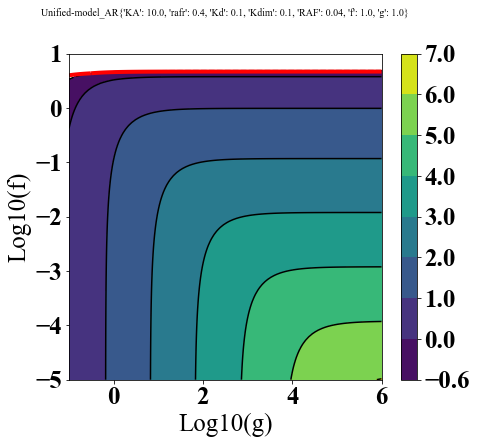

In [23]:
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 25}
plt.rc('font', **font)
plt.figure(figsize=(7,6))
colormaptype='viridis'
fileid="AR"
minlevel=-.6
levels=[minlevel]+[i/10 for i in range(0,75,10)]
cp0 = plt.contourf(X,Y,zr,cmap=colormaptype,levels=levels)
plt.contour(cp0,colors='k',linewidths=1.5)
plt.colorbar(cp0)
plt.contour(cp,colors='r',linewidths=4.,levels=[0.01],linestyles='solid')
# plt.plot([-0.4,-0.4],[-5,0],'--k')
plt.xlabel('Log10(g)')
plt.ylabel('Log10(f)')
figname="Unified-model_"+fileid+str(paramsbase)
plt.title(figname,size=10,y=1.1)
plt.show()

#### KA vs f

In [17]:
%%time
paramsbase={'KA':10.,'rafr':0.4,'Kd':0.1,'Kdim':0.1,'RAF':0.04,'f':1.0,'g':10.0} #units: micro-molar
# paramsbaser={'KA':0.0001,'rafr':0.04,'Kd':0.1}
npts=10000 # total number of points to plot
npts=int(np.sqrt(npts)) # square root of the number of points to put on a square grid
xlist = np.linspace(-2.0, 1.0,npts)
ylist = np.linspace(-5.0, 1.0,npts)
X, Y = np.meshgrid(xlist, ylist)
X, Y = np.meshgrid(xlist, ylist)
def callfnr(x1,y1):
    params1=dict(paramsbase)
    params1['f']=10**y1
    params1['KA']=10**x1
#     print(params1)
    try:
        resarr=solrange(params1)
#         print(resarr)
        if resarr[0]>10**-5:
            return  [np.log10(resarr[1]),np.log10(resarr[2])]
        else:
            return [float('nan'),float('nan')]
    except:
        return [float('nan'),float('nan')]
zfc=[]
zr=[]
for itr in range(len(X)):
    zfc=zfc+[[]]
    zr=zr+[[]]
    for jtr in range(len(X[itr])):
        res=callfnr(X[itr][jtr],Y[itr][jtr])
        zfc[itr]=zfc[itr]+[res[0]]
        zr[itr]=zr[itr]+[res[1]]
# npts=20
# xlist=np.linspace(-1,0.5,npts)
# ylist=np.linspace(-1,0,npts)
# Xin,Yin=np.meshgrid(xlist,ylist)
# Zin=[[callfnr(Xin[itr][jtr],Yin[itr][jtr]) for jtr in range(len(Xin[itr]))] for itr in range(len(Xin))]

Wall time: 24.5 s


In [18]:
'maximum fold change in Unified model:',round(10**max([col for row in zfc for col in row if str(col) != 'nan']),2)

('maximum fold change in Unified model:', 71.85)

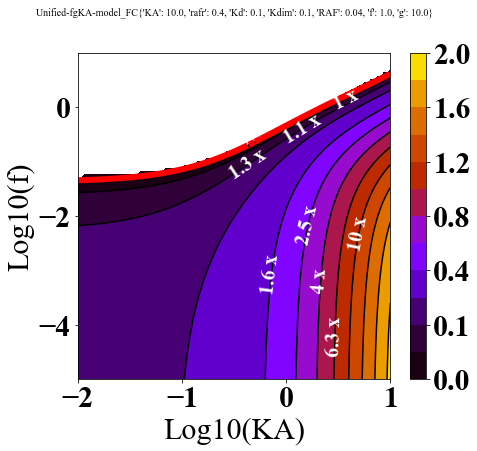

In [19]:
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 30}
plt.rc('font', **font)

def fmt(x):
    x=10**x
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} x" if plt.rcParams["text.usetex"] else f"{s} x"

plt.figure(figsize=(7,6))
colormaptype='gnuplot'
fileid="FC"
levels=[0,0.05,0.1]+[i/100 for i in range(20,201,20)]
zfc1=[[10**icol for icol in irow] for irow in zfc]
cp = plt.contourf(X,Y,zfc,cmap=colormaptype,levels=levels)
plt.contour(cp,colors='k',linewidths=1.5)
plt.colorbar(cp)
plt.clabel(cp,levels=[0,0.05,0.1,0.2,0.4,0.6,0.8,1.],inline=4,fmt=fmt, fontsize=20,colors='w')
plt.contour(cp,colors='r',linewidths=6.,levels=[0.0245],linestyles='solid')
plt.xlabel('Log10(KA)')
plt.ylabel('Log10(f)')
figname="Unified-fgKA-model_"+fileid+str(paramsbase)
plt.title(figname,size=10,y=1.1)
plt.show()